In [2]:
from smc.samplers import NormalSampler, MultimodalNormalSampler, NormalPathSampler, MeanFieldIsingSampler
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Univariate Normal Sampler

In [3]:
D = 10
mean = np.arange(D).astype(float)
cov = stats.wishart(df= 2*D, scale =np.eye(D)).rvs(1)
normal_smc = NormalSampler(mean, cov)

Loading Stan model...


In [4]:
path = [(beta,) for beta in np.linspace(0.01,1,100)]
output = normal_smc.sampling(path, 1000)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 100 
Elapsed time: 60.9 seconds.


In [5]:
output[0].mean(0)-np.arange(D)

array([-0.02193534,  0.03881291,  0.09076113, -0.22791687,  0.1642674 ,
        0.13670063,  0.03615495, -0.19294596, -0.04081627,  0.02682344])

### Multimodal Normal Sampler

In [6]:
means = (5.0,-5.0)
scales = (1.0, 1.0)
probability = 0.5
dimension = 2

multimodal_smc = MultimodalNormalSampler(means, scales, probability, dimension)

Loading Stan model...


In [7]:
S = 100 # number of steps to take
N = 1000 # number of samples to use
path = [(beta,) for beta in np.linspace(0.01,1,S+1)]
output = multimodal_smc.sampling(path, N , save_all_samples=True)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 100 
Elapsed time: 47.6 seconds.


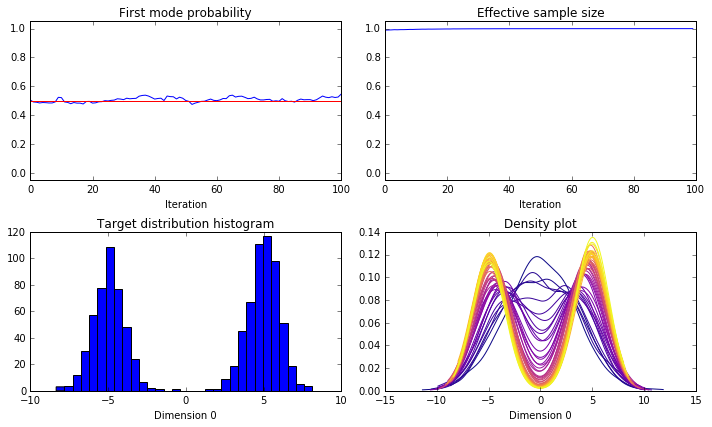

In [8]:
multimodal_smc.plot_diagnostics(output)

## Normal to Normal path. 

In [9]:
D = 10
mean1 = np.zeros(D); mean2 = mean1 + 5
rng = stats.wishart(df=2*D, scale=np.eye(D))
covariance1, covariance2 = rng.rvs(2); 
normal_path_smc = NormalPathSampler(mean1, mean2, covariance1, covariance2)

Loading Stan model...


In [24]:
S = 30 # number of steps to take
N = 4000 # number of samples to use
path = [(beta,1.0) for beta in np.linspace(0,1,S+1)]
output = normal_path_smc.sampling(path, N , save_all_samples=True)

% complete:  10 13 16 40 43 46 70 73 76 
Elapsed time: 68.2 seconds.


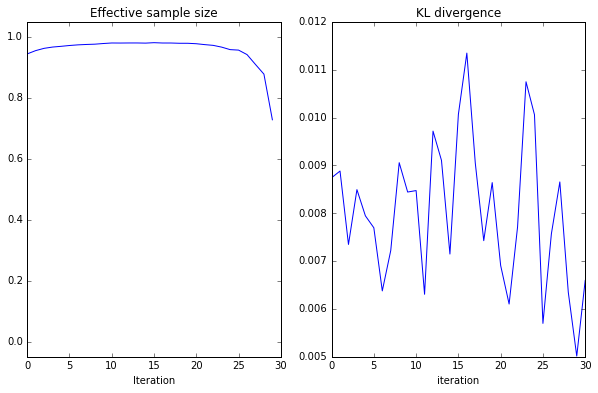

In [25]:
normal_path_smc.plot_diagnostics(output, path)

## Ising Model

In [22]:
alpha = 3.0
dimension = 500
ising_smc = MeanFieldIsingSampler(dimension, alpha)

In [23]:
N = 10**4
path = [(beta,) for beta in np.linspace(0,1,101)]
output = ising_smc.sampling(path, N, save_all_samples=True)

% complete:  1 4 7 10 13 16 19 22 25 28 31 34 37 40 43 46 49 52 55 58 61 64 67 70 73 76 79 82 85 88 91 94 97 100 
Elapsed time: 461.6 seconds.


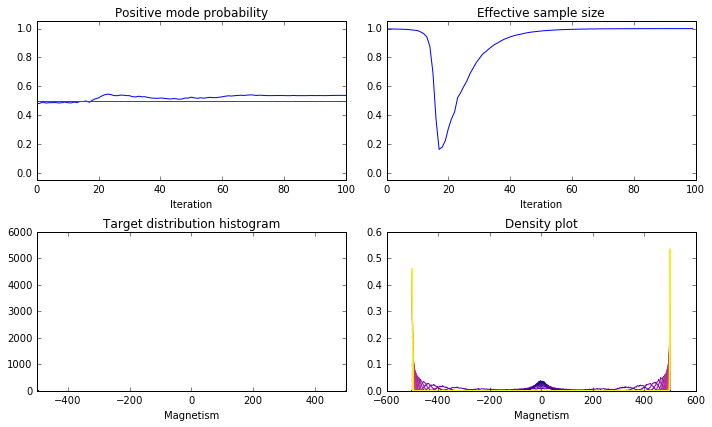

In [24]:
ising_smc.plot_diagnostics(output)